# Importing Libraries

In [277]:
#for data frame processing
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# for 3D projection
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

#for clustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from scipy.spatial import distance


#Loading Data

In [278]:
#uploading csv from local computer
from google.colab import files
upload=files.upload()

Saving co2_data.csv to co2_data (7).csv


In [279]:
#reading csv file using pandas
df=pd.read_csv('co2_data.csv') 


#Examining and Learning about the features of the dataframe

In [280]:
#getting general idea about data frame (df)
df.describe()

,Footprint,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,3.153228,309.438664,9.740970,11.842554,41.673958,9.485781,2.369490,41.997645,0.151192,0.945864,2.507576,0.543573,69.044110,3.161282,0.261492,0.257690,100.253929,0.141113,2.829183,27.656178,0.460259,184.630124,14.117218,1.402571
std,5.784729,133.478373,8.692503,12.089341,25.828077,12.613222,3.112622,112.736932,0.208641,4.651032,15.236643,0.832543,108.862832,2.691079,0.321366,0.410630,366.809270,0.194064,2.062393,26.731148,0.820183,392.312597,16.177352,2.059856
min,0.109000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.656933,233.750000,4.575000,3.975000,22.300000,0.000000,0.000000,0.000000,0.035000,0.000000,0.000000,0.000000,5.160000,1.241250,0.137625,0.079514,15.000000,0.056875,1.585250,13.150000,0.029250,85.750000,3.400000,0.357500
50%,1.410662,291.750000,7.120000,10.000000,47.800000,3.670000,1.700000,2.000000,0.063000,0.039167,0.000000,0.284015,55.500000,2.792000,0.213050,0.204200,43.692308,0.104141,2.549233,22.000000,0.253000,129.250000,10.425000,0.654167
75%,3.192850,402.250000,10.675000,16.199000,62.327381,15.498750,3.000000,28.250000,0.168125,0.210000,0.300000,0.742500,103.000000,4.523250,0.301000,0.365250,96.093750,0.192527,3.585000,34.525000,0.543000,202.559091,23.675000,1.222500
max,71.392768,900.000000,59.380000,100.000000,86.130000,61.330000,20.500000,1044.000000,1.110000,71.000000,190.000000,6.280000,1562.500000,26.250000,4.100000,6.435000,5857.333333,2.789000,16.200000,207.000000,8.622014,6326.000000,194.000000,12.100000


In [281]:
df.head()

,Item,Footprint,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,agave cooked southwest,0.689880,135.0,0.99,0.29,32.00,20.87,10.6,6.0,0.087,0.0,0.3,0.36,3.0,0.162,0.099,0.012,460.0,0.112,3.55,39.0,0.142,9.0,0.2,0.25
1,agave dried southwest,1.033267,341.0,1.71,0.69,81.98,50.70,15.6,1.0,0.216,0.0,0.3,0.76,7.0,0.870,0.644,0.021,770.0,0.189,3.64,207.0,0.337,37.0,0.6,12.10
2,agave raw southwest,1.691278,68.0,0.52,0.15,16.23,2.58,6.6,2.0,0.055,0.0,4.0,0.23,7.0,0.162,0.039,0.029,417.0,0.138,1.80,55.0,0.094,7.0,0.4,0.15
3,bear black,1.496333,155.0,20.10,8.30,0.00,0.00,0.0,0.0,0.000,0.0,0.0,0.00,0.0,3.200,0.680,0.160,0.0,0.000,7.20,0.0,0.000,162.0,0.0,0.00
4,blackberries wild,0.491000,52.0,0.84,1.07,9.84,3.65,3.2,5.0,0.039,0.0,4.7,0.91,11.0,0.314,0.144,0.060,5.0,0.222,0.21,4.0,0.287,11.0,0.0,0.15


In [282]:
#to know data types in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item           284 non-null    object 
 1   Footprint      284 non-null    float64
 2   Energy_kcal    284 non-null    float64
 3   Protein_g      284 non-null    float64
 4   Fat_g          284 non-null    float64
 5   Carb_g         284 non-null    float64
 6   Sugar_g        284 non-null    float64
 7   Fiber_g        284 non-null    float64
 8   VitA_mcg       284 non-null    float64
 9   VitB6_mg       284 non-null    float64
 10  VitB12_mcg     284 non-null    float64
 11  VitC_mg        284 non-null    float64
 12  VitE_mg        284 non-null    float64
 13  Folate_mcg     284 non-null    float64
 14  Niacin_mg      284 non-null    float64
 15  Riboflavin_mg  284 non-null    float64
 16  Thiamin_mg     284 non-null    float64
 17  Calcium_mg     284 non-null    float64
 18  Copper_mcg

In [283]:
#convert all data types to float
cols = ['Energy_kcal', 'VitA_mcg', 'Folate_mcg', 'Calcium_mg','Magnesium_mg', 'Phosphorus_mg']
for col in cols:
   df[col] = df[col].apply(lambda x: float (x) if x == x else "")

In [284]:
#checking data type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item           284 non-null    object 
 1   Footprint      284 non-null    float64
 2   Energy_kcal    284 non-null    float64
 3   Protein_g      284 non-null    float64
 4   Fat_g          284 non-null    float64
 5   Carb_g         284 non-null    float64
 6   Sugar_g        284 non-null    float64
 7   Fiber_g        284 non-null    float64
 8   VitA_mcg       284 non-null    float64
 9   VitB6_mg       284 non-null    float64
 10  VitB12_mcg     284 non-null    float64
 11  VitC_mg        284 non-null    float64
 12  VitE_mg        284 non-null    float64
 13  Folate_mcg     284 non-null    float64
 14  Niacin_mg      284 non-null    float64
 15  Riboflavin_mg  284 non-null    float64
 16  Thiamin_mg     284 non-null    float64
 17  Calcium_mg     284 non-null    float64
 18  Copper_mcg

In [285]:
"""
* preparing data for normalization to keep values between 0 and 1
* using MinMaxScaler class available in the Scikit-learn library
* min-max approach rescales the feature to a fixed range of [0,1]
* Xnorm = X - Xmin / Xmax - Xmin
"""
#selecting numerical values in df only
df_num = df.select_dtypes(include=[np.number]) 
#to keep Footprint value out of normalization
df_num_1 = df_num.drop(['Footprint'], axis = 1)
#verifying changes
df_num_1.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,135.0,0.99,0.29,32.00,20.87,10.6,6.0,0.087,0.0,0.3,0.36,3.0,0.162,0.099,0.012,460.0,0.112,3.55,39.0,0.142,9.0,0.2,0.25
1,341.0,1.71,0.69,81.98,50.70,15.6,1.0,0.216,0.0,0.3,0.76,7.0,0.870,0.644,0.021,770.0,0.189,3.64,207.0,0.337,37.0,0.6,12.10
2,68.0,0.52,0.15,16.23,2.58,6.6,2.0,0.055,0.0,4.0,0.23,7.0,0.162,0.039,0.029,417.0,0.138,1.80,55.0,0.094,7.0,0.4,0.15
3,155.0,20.10,8.30,0.00,0.00,0.0,0.0,0.000,0.0,0.0,0.00,0.0,3.200,0.680,0.160,0.0,0.000,7.20,0.0,0.000,162.0,0.0,0.00
4,52.0,0.84,1.07,9.84,3.65,3.2,5.0,0.039,0.0,4.7,0.91,11.0,0.314,0.144,0.060,5.0,0.222,0.21,4.0,0.287,11.0,0.0,0.15


In [286]:
"""
* Data normalization using MinMaxScaler
* To keep values between 0 and 1
* This is a better approach for clustering
"""
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_num_1 = pd.DataFrame(scaler.fit_transform(df_num_1), columns=df_num_1.columns)

#assign normalized values back to the original df
df[df_num_1.columns] = df_num_1

#verifying changes
df.head()

,Item,Footprint,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,agave cooked southwest,0.689880,0.150000,0.016672,0.0029,0.371531,0.340290,0.517073,0.005747,0.078378,0.0,0.001579,0.057325,0.00192,0.006171,0.024146,0.001865,0.078534,0.040158,0.219136,0.188406,0.016469,0.001423,0.001031,0.020661
1,agave dried southwest,1.033267,0.378889,0.028798,0.0069,0.951817,0.826675,0.760976,0.000958,0.194595,0.0,0.001579,0.121019,0.00448,0.033143,0.157073,0.003263,0.131459,0.067766,0.224691,1.000000,0.039086,0.005849,0.003093,1.000000
2,agave raw southwest,1.691278,0.075556,0.008757,0.0015,0.188436,0.042068,0.321951,0.001916,0.049550,0.0,0.021053,0.036624,0.00448,0.006171,0.009512,0.004507,0.071193,0.049480,0.111111,0.265700,0.010902,0.001107,0.002062,0.012397
3,bear black,1.496333,0.172222,0.338498,0.0830,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.121905,0.165854,0.024864,0.000000,0.000000,0.444444,0.000000,0.000000,0.025609,0.000000,0.000000
4,blackberries wild,0.491000,0.057778,0.014146,0.0107,0.114246,0.059514,0.156098,0.004789,0.035135,0.0,0.024737,0.144904,0.00704,0.011962,0.035122,0.009324,0.000854,0.079598,0.012963,0.019324,0.033287,0.001739,0.000000,0.012397


#Data visualization

In [ ]:
#displaying data frame in Axes
fig, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, 
            fmt = ".2f", 
            cmap = 'coolwarm',
            cbar_kws = {"shrink": .8})

In [ ]:
#displaying distribution of all nutritions in items
plt.rcParams["figure.figsize"] = (20, 18)
df.hist()

In [ ]:
#closer look at footprint  distribution in items
sns.displot(df, x='Footprint')
plt.title("Carbon footprint distribution of food items")

In [ ]:
#displaying nutrition to footprint relation for all items
data = df.drop(['Item', 'Footprint'], axis = 1)
for dato in data:
    fig = px.scatter(df, x = 'Footprint', y = dato,
                    size = dato, color = 'Item')
    fig.show()

#K-means Clustering

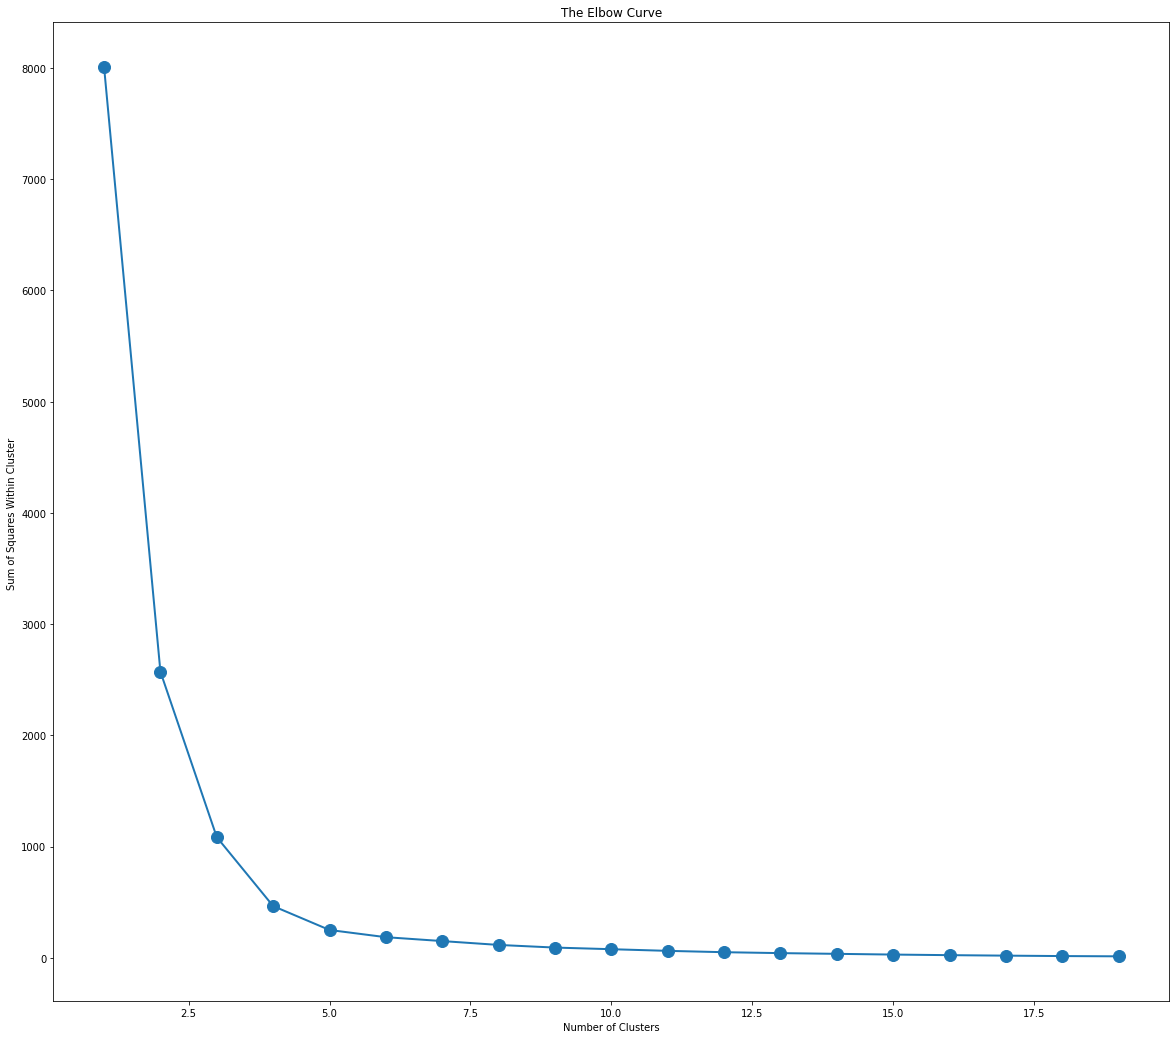

In [299]:
"""
KMeans clustering arguments

* WCSS: ( Within-Cluster Sum of Square distance between each point and the centroid in a cluster)
* n_clusters: is number of clusters decided by elbow method
* init: is the method for initializing the centroid
* k-means++: for smarter initialization of centroids
* max_iter: maximum number of iterations of the k-means algorithm for a single run
* n_init: Number of time the k-means algorithm will be run with different centroid seeds (defult is 10)
* random_state: determines random number generation for centroid initialization
"""

#droping features we do not want to cluster based on
# X1 has the clustering features (Energy_kcal, Protein_g, Fat_g, Carb_g, Sugar_g, Fiber_g, Calcium_mg, Iron_mg, Magnesium_mg, VitC_mg)

X1 = df.drop(['Item', 'Footprint', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg','VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg', 'Copper_mcg', 'Manganese_mg', 'Phosphorus_mg'], axis = 1)

#using the Elbow method to find the optimal K value (number of clsters).
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=10,n_init=10,random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

#plot the WCSS with K value
#the plot looks like an Elbow. 
#As the number of clusters increases, the WCSS value will start to decrease
#The point at which the elbow shape is created is 4, that is, our K value or an optimal number of clusters is 4.

plt.plot(range(1,20),wcss, linewidth = 2, markersize = 12, marker='o')
plt.title('The Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Within Cluster ')
plt.savefig('elbow.png')
plt.show()

In [300]:
#Printing centroids
centroids = kmeans.cluster_centers_
print(centroids)

[[ 4.30976703e-01  1.11367225e-01  1.80578687e-01  5.85248953e-01
   8.06204905e-02  8.36564760e-02  3.61134692e-03  1.15079198e-02
   1.18247212e-01  8.27007131e-02  6.10827712e-02  4.84875462e-02
   6.00000000e+00]
 [ 4.66265353e-01  1.54939634e-01  1.12654354e-01  8.19634643e-01
   6.34397902e-02  1.36807076e-01  2.05184837e-03  1.30978246e-02
   2.28265070e-01  1.55343792e-01  8.15569772e-02  7.09257463e-02
   1.80000000e+01]
 [ 2.80435185e-01  8.46553273e-02  1.20207500e-01  3.68639460e-01
   7.12348497e-02  4.27235772e-02  4.84210526e-03  1.25156499e-02
   7.38477366e-02  6.98067633e-02  5.08462199e-02  4.42355372e-02
   1.00000000e+00]
 [ 2.23269434e-01  3.81396007e-01  1.18836941e-01  9.41221401e-03
  -2.77555756e-17  1.38777878e-17  2.51879699e-03  4.26593382e-03
   1.71596120e-01  5.29622551e-02  6.46066047e-02  4.84624466e-02
   1.10000000e+01]
 [ 2.27009648e-01  4.11307631e-01  1.15189733e-01  2.63876600e-03
   2.77555756e-17 -2.77555756e-17  6.41560799e-03  1.89394351e-03


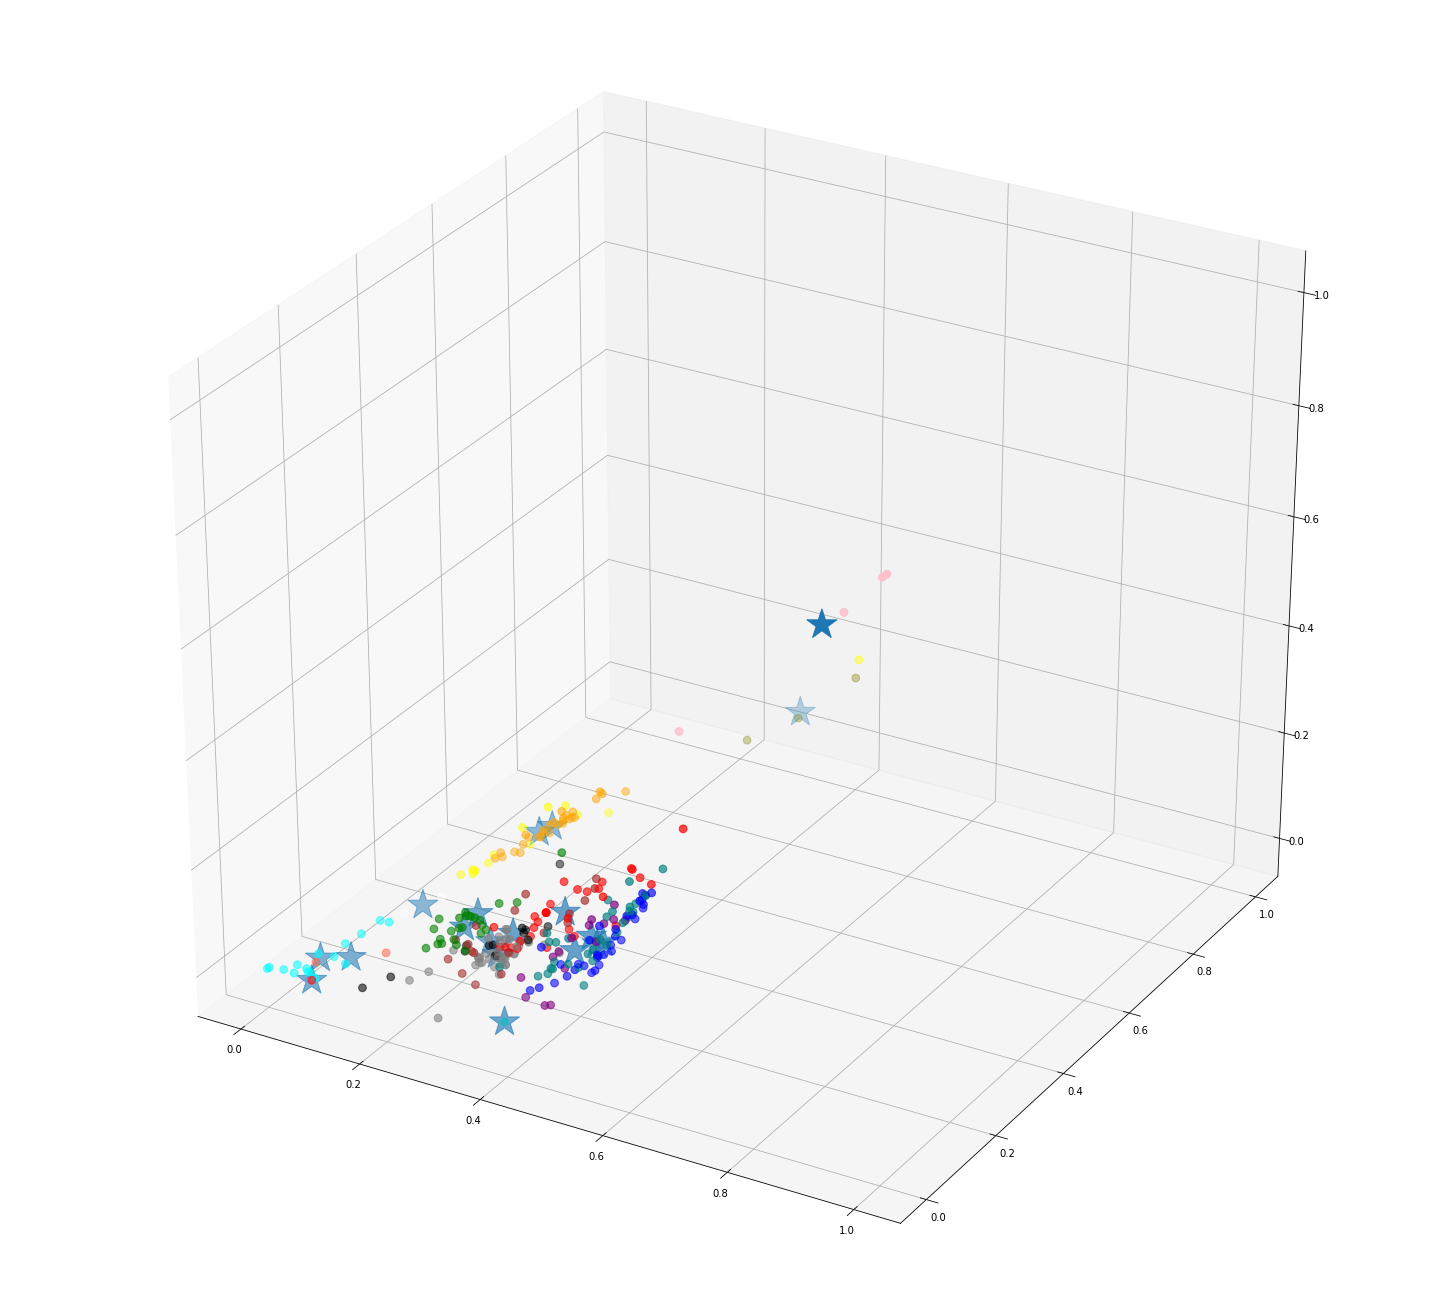

In [303]:
labels = kmeans.predict(X1)
C = kmeans.cluster_centers_
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'black', 'gray', 'pink', 'purple', 'teal', 'cyan', 'olive', 'brown', 'white', 'tomato', 'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
assign = []

for row in labels:
    assign.append(colors[row])
    
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1.iloc[:, 0], X1.iloc[:, 1], X1.iloc[:, 2], c = assign, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', s = 1000)

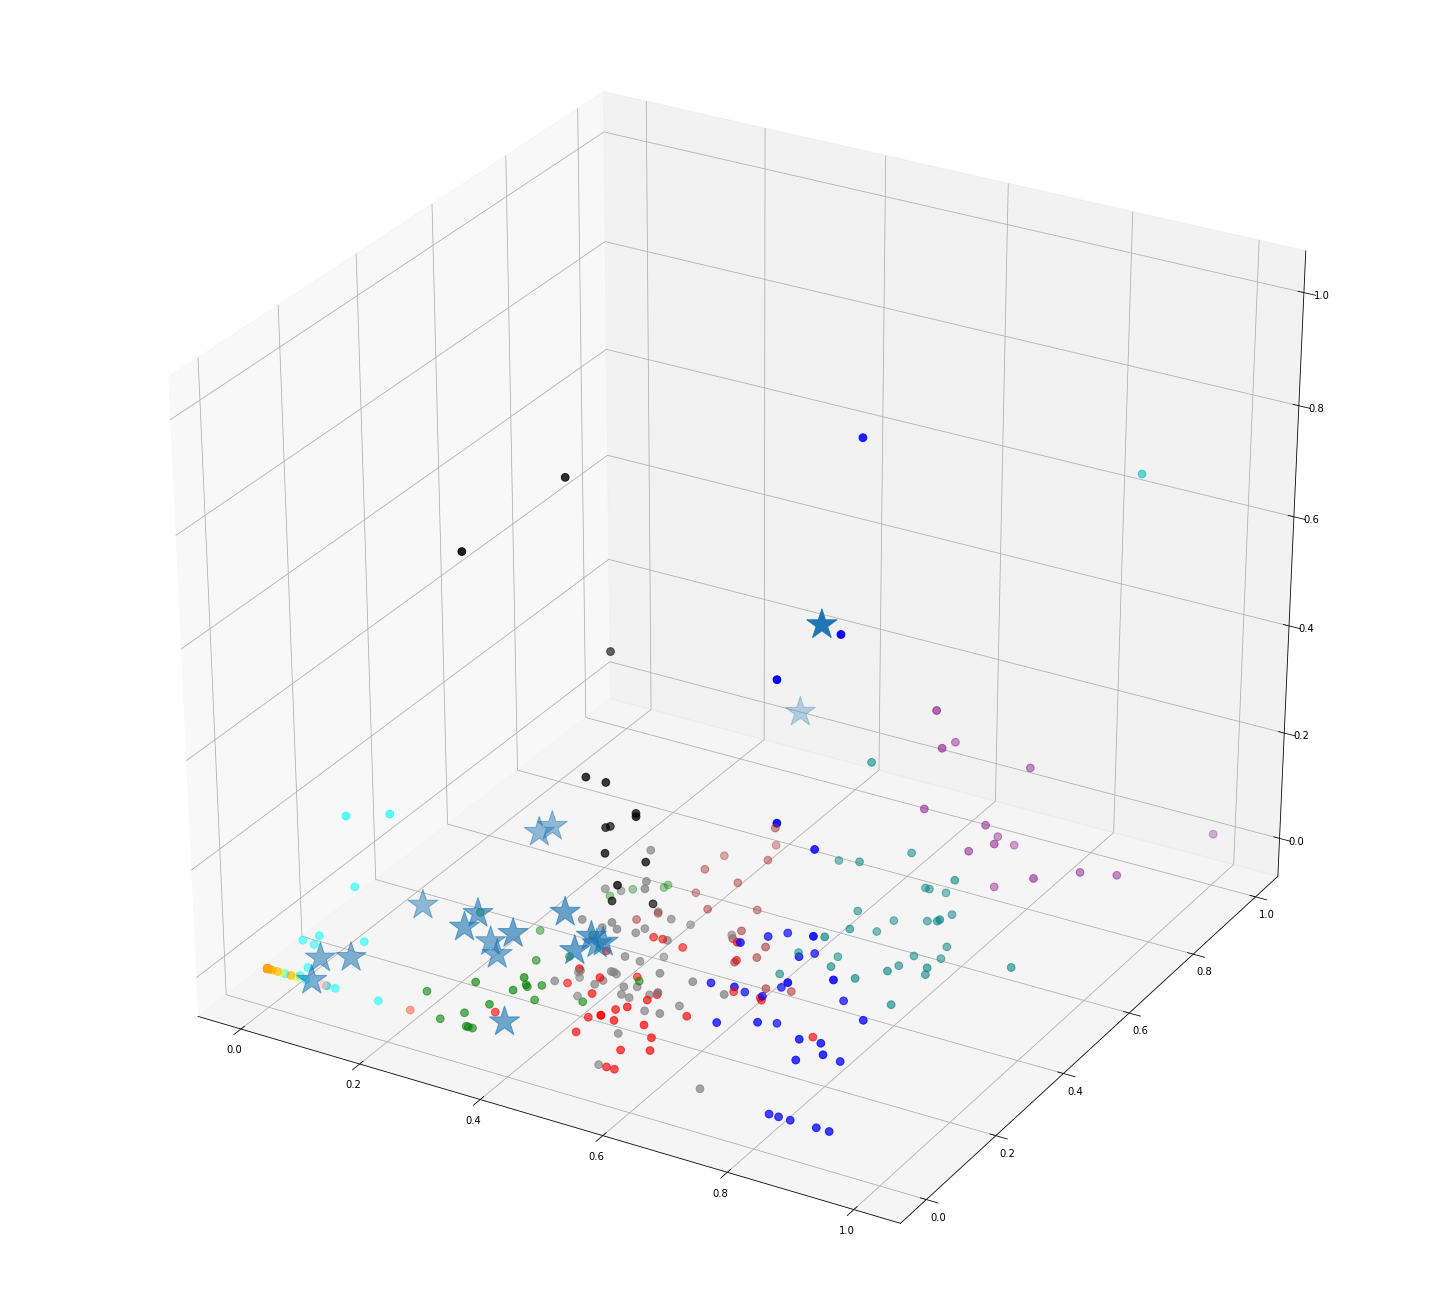

In [305]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1.iloc[:, 3], X1.iloc[:, 4], X1.iloc[:, 5], c = assign, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', s = 1000)

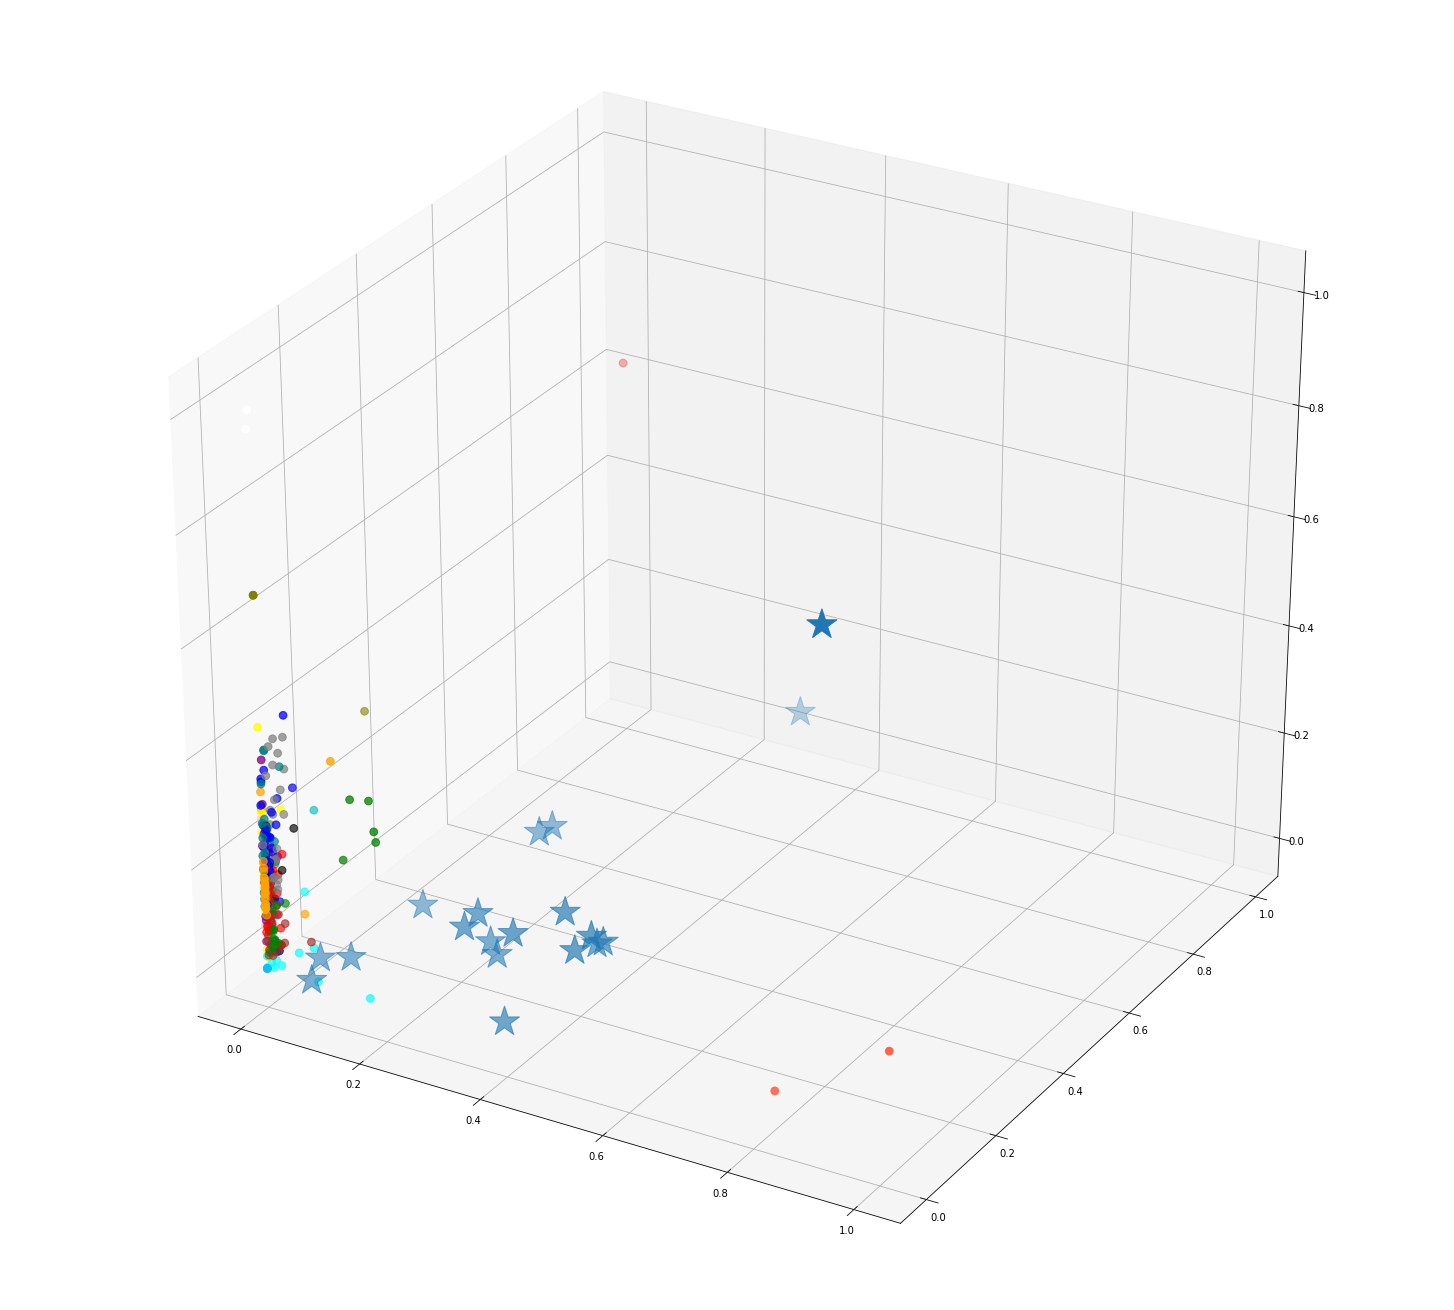

In [307]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X1.iloc[:, 6], X1.iloc[:, 7], X1.iloc[:, 8], c = assign, s = 60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker = '*', s = 1000)

In [310]:
#showing how many items per colour
copy = pd.DataFrame()
copy['Item'] = df['Item'].values
copy['Footprint'] = df['Footprint'].values
copy['label'] = labels
amount = pd.DataFrame()
amount['color'] = colors
amount['amount'] = copy.groupby('label').size()
amount

,color,amount
0,red,31.0
1,blue,28.0
2,green,20.0
3,yellow,14.0
4,orange,29.0
5,black,14.0
6,gray,45.0
7,pink,4.0
8,purple,15.0
9,teal,31.0


In [312]:
#compiling data frame with new values#

#adding cluster_ID column to X1
X1['Cluster_ID'] = pd.DataFrame(kmeans.labels_)

#assign values back to the original df
df[X1.columns] = X1

#saving df to csv
df.to_csv('cluster_food.csv')

#to show number of items in each cluster
df['Cluster_ID'].value_counts()

6     45
9     31
0     31
4     29
1     28
2     20
12    18
10    16
8     15
5     14
3     14
15     5
16     5
7      4
11     3
14     2
13     2
17     1
18     1
Name: Cluster_ID, dtype: int64

#User's console view

In [291]:
food_choice = input("Enter a Food Item: ")

Enter a Food Item: bear black


In [314]:
def recomandation(food_choice):
  food_choice = food_choice.lower()
  df_user_choice = df.loc[df['Item'] == food_choice]
  user_choice_carbon_footprint = float(df_user_choice['Footprint'])
  df_same_cluster = df.loc[df['Cluster_ID'] == int(df_user_choice['Cluster_ID'])]
  df_lower_CFP = df_same_cluster.loc[df_same_cluster['Footprint'] < user_choice_carbon_footprint]
  if len(df_lower_CFP) == 0:
    print('Great choice!')
  else:
    print(food_choice + ': has a carbon footprint of {} GHG'.format('%.2f'%user_choice_carbon_footprint))
    print('\n')
    print('Here is a list of items with lower carbon footprint:')
    print('\n')
    print(df_lower_CFP.sort_values(["Footprint"], ascending=True))


recomandation(food_choice)

bear black: has a carbon footprint of 1.50 GHG


Here is a list of items with lower carbon footprint:


               Item  Footprint  Energy_kcal  ...  Selenium_mcg  Zinc_mg  Cluster_ID
15   caribou tongue      1.005     0.288889  ...           0.0      0.0           3
42  squirrel ground      1.020     0.123333  ...           0.0      0.0           3

[2 rows x 26 columns]
